# 2020 SUMMER 1st SESSION [LR - SOFTMAX]

# 1. Linear regression

## 1-1. 세션소개


# 이번 방학에 다룰 주제는? 딥러닝이란? 

<img src="img/img1.png"></img>

source : https://medium.com/@harish_6956/what-is-machine-learning-deep-learning-7788604004da

1) 인공지능 (AI) : 기계가 인간의 행동을 따라하게끔 하는 기술

- 약 인공지능 (Weak AI) : 기계가 "생각을 하는 듯한" 특성을 지님. 

  ex) Deep blue / Alpha Go , Bixby / Siri 등등. 보통 SF 영화가 경계하는 것과는 거리가 멀다
  
- 강 인공지능 (Strong AI): 실제 뇌와 같이 행동. 최소 인간과 같은 정도의 인지 능력을 가짐.

  ex) 블레이드 러너, Elon Musk "All advanced AI development should be regulated, including at Tesla" 에서 그가 경계하는 AI는 Strong AI

source : https://www.machinedesign.com/markets/robotics/article/21835139/whats-the-difference-between-weak-and-strong-ai


2) 머신러닝 (2020.1학기 ESC) : 인간의 개입을 **최소로** 하여 데이터로부터 학습 -> 패턴인식 -> 의사결정 방식 <br>
Structured data를 바탕으로 예측을 진행하며 사람이 부여한 rule에 맞춘 Rule-based system이 아니라, 해당 rule를 기계가 직접 학습하는 방식으로 작용한다. 하지만 인풋데이터를 어느정도 사람이 구조화시켜야 한다.


- Supervised Learning 

  - 정답이 있는 데이터 사용, Response의 예측 (회귀모형, 분류모형, 의사결정모형, **신경망** 등등)
  
      - Response가 수치형인 회귀 (regression) 
      - Response가 범주형인 분류 (classification)

- Unsupervised Learning

   - 정답이 없는 데이터 사용, Response이 구조 설명 및 묘사 (Cluster Analysis, PCA 등등)
   
- Reinforcement Learning

   - 각 상태에서 reward를 최대화하는 policy를 학습 
   
      ex) 알파고, 무인자동차


3) 딥러닝 (2020 여름, 가을 ESC) : 인간의 개입이 **없이** 이루어지며 인간의 **뉴런**과 유사한 **다층 신경망** (Multilayer Neural Network) 을 기본으로 하는 방식 <br>
Deep learning은 all possible inputs에 대해 학습을 진행한다. Raw data에서 바로 특징을 포착하기 때문에 인간이 개입할 영역이 없다.

source : https://medium.com/@harish_6956/what-is-machine-learning-deep-learning-7788604004da


In [3]:
import numpy as np
import torch

# gif첨부를 위한 코드
def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')



 3-1) 뉴런과 다층신경망이란?
![img2.png](img/img2.png) 

source : https://bi.snu.ac.kr/Courses/IntroAI/slides/NN.pdf



![img3.png](img/img3.png)

https://cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.0-Biology.pdf


- neuron & unit

- dendrite & weight 

- synapse & connection

     뉴런 : 수상돌기 (Dendrite)를 통해 다른 뉴런을 통해 입력 신호를 받아 축색돌기 (Axon)을 통해 다른 뉴런으로 신호 내보냄
    
 
     시냅스 : 뉴런 and 뉴런 연결
    
     활성화(Activate) : 입력된 신호가 일정한 조건 (threshold)를 넘어설 때


https://brunch.co.kr/@gdhan/6

## 1-2. 회귀분석

![lr.png](img/lr.png)
source : https://allmodelsarewrong.github.io/ols.html

만약에 특정 선수의 연봉을 예측한다라고 하면, 첫번째 아이디어는 해당 레벨에 속하는 선수들의 연봉의 평균으로 특정 선수의 연봉을 예측을 하는 것이다. 하지만 이러한 예측 아이디어는 small sample 문제를 야기한다. 해당 문제는 각 레벨별 선수들이 충분하지 않으면 이상치의 영향을 쉽게 받는다. 또한 각 레벨별로 모수가 존재하기 때문에, 각 레벨별 데이터로만 각 모수를 추정해야하기 때문에 문제가 있다. 그리고 만약 7년째 선수의 데이터가 없는 경우 아예 예측이 불가능하다. 즉, 데이터의 경향을 반영하지 못하는 문제가 있다.

하지만 linear regression의 경우 각 레벨별 평균은 선형을 이룬다는 가정이 들어간다. 그렇기 때문에 일차직선에 필요한 기울기와 절편 두가지만 모수로 추정을 하면된다. 7년째 선수의 데이터가 없어도 선형적 관계를 이용해서 예측이 가능하다. 물론 선형관계가 맞는지는 회귀분석을 진행하기전에 확인을 해야한다.

## 1-3. Loss, cost

$$ L[y,\hat y] $$

Loss function은 실제값과 예측값의 차이에 대한 함수이다. Loss function은 single data set을 다루고, cost function은 entire data set을 다룬다. 순간순간의 loss를 판단할 때는 loss function을 사용하고 학습이 완료된 후에는 보통 cost function을 이용한다.

 이 때의 예측값은 weight에 따라서 값이 달라진다. Initilization 단계에서 처음에 w를 우리가 설정을 하고, 점점 학습을 통하면서 최적의 w를 찾아나간다. 또한 이 weight는 모델의 파라미터와 관련이 있다. 모델의 파라미터란 결국 특정 분포에서 도출된 Y값 분포의 모수를 의미한다. 예를 들어 Y가 연속형이면 Normal dist의 mean이 모수가 되며(var는 고정 가정), Binary class라면 이항분포의 p가 모수가 될 것이다. Y가 Multi class를 가지는 범주형 변수라면 다항분포에서의 $\pi$가 모수가 된다.
 
 예를 들어 Simple linear regression에서는 $ w = {[\beta_0 \;\; \beta_1]}^T $이고($ X = {[1 \;\; x]}^T $) Y가 비롯된 정규분포에서의 모수(분산은 고정 가정) 다음과 같다. $ \mu_i = E[Y_i|X] = \beta_0 + \beta_1 X_i $

$$ loss_{lr} = (\hat{y}-y)^2 = (w^T X-y)^2 $$

하나의 input data에 대해서 loss는 단 하나의 값을 가진다. 이 때 결국 우리의 목표는 이러한 모수들을 어떻게 조절해야 예측값이 실제값과 가까워 지냐이다. 그리고 **'얼마나 가깝냐'** 를 식으로 나타낸 것이 Loss function이다. Loss는 Y가 연속형인 회귀분석에서는 MSE로 정의가 되고, Y가 Binary class인 경우에는 binary cross entropy로 정의가 된다.(왜냐하면 Binomial distribution의 Negative log-likelihood가 결국 binary cross entropy이기 때문이다.)

여기서는 간단한 선형회귀 분석을 이야기 하고 있으므로 MSE에 대한 이야기를 계속할 것이다.

$$ Cost = \dfrac{1}{N} \sum^{N}_{n=1} (\hat{y_n}-y_n)^2 $$

 전체 input data에 대한 loss를 계산하기 위해 개별 loss값의 정보를 합쳐줄 Total loss가 필요하고 이를 cost로 정의하겠다. 회귀분석에서 Cost function은 MSE 이다.
 
reference : http://jaejunyoo.blogspot.com/2018/02/minimizing-negative-log-likelihood-in-kor-3.html

\begin{equation*}
Cost =  \begin{bmatrix}
x_{1,1} & \dots & x_{m,1} \\ \vdots & \ddots & \vdots \\ x_{n,1} & \dots & x_{n,m} 
\end{bmatrix} 
\begin{bmatrix}
w_1 \\ \vdots \\ w_m
\end{bmatrix}
- \begin{bmatrix} 
y_1 \\ \vdots \\ y_n
\end{bmatrix} \\ 
\end{equation*}

$$ Cost = \dfrac{1}{N}L^TL $$

아래는 간단하 예시이며, w값에 따라 cost가 어떻게 변하는지 관찰한다.
아래의 예시에서는 cost와 loss를 구분하지 않고 설명하고 있다.

![mse](img/mse.png)
source : https://www.youtube.com/watch?v=l-Fe9Ekxxj4&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&index=2

X가 1차원인 데이터셋에서, weight를 각각 0~4로 주었을 때의 예측값과 실제값과의 차이를 나타낸 표이다.

![loss](img/loss.png)
source:  https://www.youtube.com/watch?v=l-Fe9Ekxxj4&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&index=2

실제 그래프로 이를 나타내면 cost를 최소화시키는 w를 쉽게 찾을 수 있다.

아래는 이를 구현하는 코드이다. 토치로 구현한 코드는 아니며, 우선 파이썬 기본 문법으로 cost를 정의하고 w에 따른 cost를 계속해 뽑아내는 방식이다.

## 1-4. 코드구현

source : https://github.com/hunkim/PyTorchZeroToAll/blob/master/01_basics.py

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [8]:
# our model for the forward pass
def forward(x):
    return x * w

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

In [9]:
# List of weights/Mean square Error (Mse) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    # Print the weights and initialize the lost
    print("w=", w)
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        # For each input and output, calculate y_hat
        # Compute the total loss and add to the total error
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    # Now compute the Mean squared error (mse) of each
    # Aggregate the weight/mse from this run
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

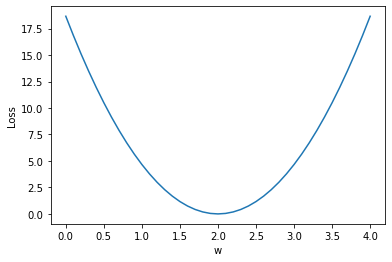

In [10]:
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# 2. Gradient descent algorithm

## 2-1 GD란 무엇인가?
결국 learning이란 무엇인가? : Loss를 최소화 하는 모델의 파라미터 $\mathbf{w}$를 찾아나가는 것이 결국 learning이다.

![gd](img/gd.png)
source : https://www.youtube.com/watch?v=b4Vyma9wPHo&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&index=3

Gradient에 대한 이야기를 잠시 하고 넘어가자.
$$ \nabla f = (\dfrac{\partial f}{\partial w_1},\dots,\dfrac{\partial f}{\partial w_n}) $$
만약 산이나 언덕의 특정 지점 (x,y)에서의 높이는 H(x,y)라고 하면, gradient는 경사가 가파른 방향(위를 바라보는)과 그 경사의 크기를 나타낸다.

$$ w=w-\alpha\dfrac{\partial loss}{\partial w} $$

Gradient descent는 결국 최적의 $ \mathbf{w} $를 찾아나가는 방식이다.

이 때 $\alpha$는 learning rate를 의미하며 hyper-parameter로서 사용자가 조정을 해서 최적의 값을 튜닝해야한다. $\alpha$가 너무 큰 경우에는 폭이 너무 커서 global minimum이 아니라 local minimum으로 잘못 수령할 수 있으며, 너무 작은 경우에는 학습 속도가 오래 걸린다는 단점이 있다.

그 방식의 프로세스는 다음과 같다. 등산을 하고 산 중턱에 도착했는데 밤이 되고 앞이 하나도 보이지 않는다고 하자. 이 때 한 걸음 한 걸음씩 내딛으면서 하산하는 길을 찾는 것이 바로 Gradient descent 방식이다. 값을 조금씩 바꿔가면서 loss를 최소화하는 $ \mathbf{w} $를 찾는 것이다.

이런 과정을 우리는 함수의 최적화라고 한다.
최적화란 목적함수(여기서는 Loss)의 함수값을 최적화(최대화 혹은 최소화)시키는 파라미터 조합을 찾는 문제이다.
목적함수의 선형여부, 제약조건의 존재여부에 따라 최적화문제가 달라진다.

보통 스코어의 경우 최대화문제이며 비용이나 손실 및 에러 등은 최소화 문제로 보통 간주한다.
하지만 f의 최대화와 -f의 최소화는 동일하므로 방법론적으로는 이 두개는 같은 선상에 놓여있다.

이러한 최적화문제는 결국 하나의 위치를 잡고(Initial point) 함수값이 감소(최소화문제)하는 방향으로 조금씩 파라미터의 값을 이동해나가는 것이다.
이 때의 이슈는 **'어느 방향으로?', '한 번에 얼만큼?'** 이다.
그리고 수학적으로 방향을 결정하는 것은 기울기(First derivative)이며, 이동량을 결정하는 것은 곡률(Second derivative)이다.

Newton's method, Gauss-Newton method, LM(Levenberg-Marquardt) 모두 Second derivative를 이용한 최적화 기법이다.

비선형 함수의 최적화는 주로 Levenberg-Marquardt를 이용하는데, Gauss-Newton method와 GD의 결합으로 볼 수 있다.

reference : https://darkpgmr.tistory.com/149


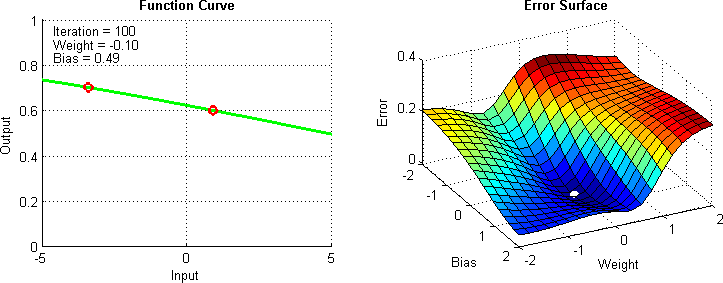

In [5]:
show_gif('img/gd1.gif')

source : https://towardsdatascience.com/improving-vanilla-gradient-descent-f9d91031ab1d

## 2-2. GD의 여러종류

## SGD(Stochastic Gradient Descent)

$$ \theta = \theta - \eta \dot \nabla_\theta J(\theta; x^{(i)};y^{(i)}) $$
    
SGD는 Mini-Batch를 이용하여 Loss를 계산하는 방식이다. 기존의 Gradient method는 Batch Gradient Descent로 전체 데이터(Batch)에 대해 Loss를 계산하여서 계산량이 너무 많다. SGD는 일부 데이터의 모음인 Mini-Batch로 계산하여 계산속도가 빠르며 동일 시간내에 더 많은 step을 갈 수 있다는 장점이 있다. Stochastic이라는 말은 이 Batch가 무작위로 계산되어 이름이 붙여졌다.

## Momentum (velocity를 추가)

$$ \upsilon_t = \alpha \upsilon_{t-1} - \eta \nabla_\theta J(\theta) $$
$$ \theta = \theta - \upsilon_t $$ 

 이동 과정에 '관성'을 준다. 즉, 과거에 이동한 방식을 기억하여 그 방향으로 일정 정도를 추가적으로 이동하는 방식이다. $\alpha$는 momentum term이다. 여기서는 $upsilon_t$를 기억하고 새로운 이동항을 구할 때 해당 항을 더해주는 방식이다.
 기존의 SGD 방식은 local minimum에 빠질 때 gradient가 0이 되어서 더 이상 이동할 수 없지만 momentum 방식은 기존에 이동했던 방향에 관성이 있어서 local minimum으로 부터 빠져나오는 것을기대할 수 있다. 하지만 이 방식의 경우 변수를 두개 저장하므로 메모리가 두 배 더 사용되는 단점이 있다.

## Nesterov accelerated gradient

$$ \upsilon_t = \gamma \upsilon_{t-1} + \eta \nabla_\theta J(\theta-\gamma \upsilon_{t-1}) $$
$$ \theta = \theta - \upsilon_t $$


![nag](img/nag.jpeg)

NAG는 Momentum 방식의 변형이다. Momentum 방식은 이동 벡터 $\upsilon_t$ 를 계산할 때 현재 위치에서의 gradient와 momentum step을 독립적으로 계산하여 합친다. 하지만 NAG에서는 momentum step을 먼저 고려하여, 해당 step이 먼저 이동했다고 생각한 후 그 자리에서의 gradient를 구해서 gradient step을 이동한다.

Momentum 방식의 경우 멈춰야하는 시점에서도 관성에 의해 멀리 갈 수 있지만, NAG의 경우 일단 모멘텀으로 이동을 한 후에 어떤 방식으로 이동할지를 결정하기 때문에 멈춰야 할 시점에 제동을 걸 수 있다.


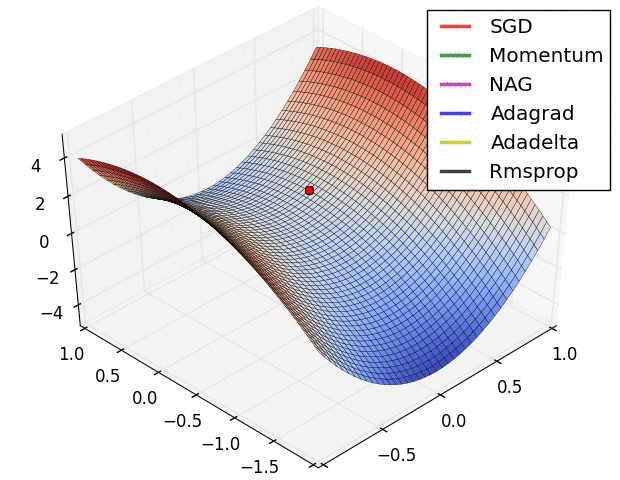

In [16]:
show_gif('img/gd2.gif')

reference : 
https://ruder.io/optimizing-gradient-descent/ <br>
http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html (image/gif source 포함)

## 2-3. 코드구현

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
# For reproducibility
torch.manual_seed(1)

Epoch : 한 번의 epoch은 전체 데이터셋에 대해 forward pass / backward pass를 거친 상태이다. 즉, 한 번 학습을 완료한 상태이다. 여기서 forward pass는 처음의 weight를 계산하는 과정이고 backward pass는 cost function을 통해 계산된 weight를 update하는 과정이다. 전체 데이터 셋에 대해서 forward pass + backward pass가 완료되면 한 번의 epoch가 진행된 것이다.

epoch = 50이면 전체 데이터를 50번 사용해서 학습을 한 것이며, 값이 너무 작으면 underfitting이고 커지면 overfitting의 확률이 높아진다.

데이터셋이 큰 경우 전체 데이터를 한 번에 돌리기 힘드므로, batch를 설정한다. Batch는 나눠진 데이터 셋을 의미하며 batch size는 한 번의 batch에 주는 샘플의 사이즈이다. Iteration은 하나의 epoch를 나눠서 실행하는 횟수를 의미한다.

![batch](img/batch.png)

source : https://www.slideshare.net/w0ong/ss-82372826

reference : https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-02_linear_regression.ipynb

In [13]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]]) # 크기는 3*1
y_train = torch.FloatTensor([[1], [2], [3]]) # 크기는 3*1
# 모델 초기화
W = torch.zeros(1, requires_grad=True) # W를 0으로 초기화하고 학습으로 값이 변경되는 변수임을 명시.
b = torch.zeros(1, requires_grad=True) # b도 W와 마찬가지.
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01) # SGD구현. Learning rate = 0.01

nb_epochs = 1000 # 전체 데이터셋 대상 SGD 반복 횟수 지정
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2) # Cost function 정의

    # cost로 H(x) 개선
    optimizer.zero_grad() # 초기화하지 않으면 미분값이 누적되므로 초기화필요.
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


In [14]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
    
# 모델 초기화
model = LinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad() # 미분값이 
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 0.578, b: -0.413 Cost: 2.147149
Epoch  100/1000 W: 1.066, b: -0.150 Cost: 0.003239
Epoch  200/1000 W: 1.052, b: -0.118 Cost: 0.002002
Epoch  300/1000 W: 1.041, b: -0.093 Cost: 0.001237
Epoch  400/1000 W: 1.032, b: -0.073 Cost: 0.000764
Epoch  500/1000 W: 1.025, b: -0.057 Cost: 0.000472
Epoch  600/1000 W: 1.020, b: -0.045 Cost: 0.000292
Epoch  700/1000 W: 1.016, b: -0.035 Cost: 0.000180
Epoch  800/1000 W: 1.012, b: -0.028 Cost: 0.000111
Epoch  900/1000 W: 1.010, b: -0.022 Cost: 0.000069
Epoch 1000/1000 W: 1.008, b: -0.017 Cost: 0.000043


# 3. Logistic Regression

## 3.1. 언제 쓰이는가?

Logistic Regression은 2 Class **분류**에 쓰입니다.Predictor 변수들의 정보가 주어졌으나 정답인 Y 변수가 주어지지 않았을 때 두 클래스 중 어디에 속할지 분류를 하기 위한 모델이죠. 이 Logistic Regression에서 클래스가 2개를 넘어갈 때 **Softmax Regression**, 다른 말로는 **multinomial Logistic Regression**이라 합니다.

주의할 점 간단히 말씀드립니다.

$$Machine learning 분야 중 하나인 Supervised Learning : \left \{ \begin{array}{cc} 회귀모형, response가 수치형\\ 분류모형, response가 범주형 \end {array} \right.$$   

1) Logistic Regression은 이름은 regression으로 쓰여 있으나 사실 ML에 쓰일 때는 분류모델입니다.

2) **분류(Classification)**도 **예측(prediction)**의 카테고리 안에 속합니다. 


## 3.2. GLM (Generalized Linear Model)

아까 살펴본 모형은 일반적인 Linear Model에 속합니다.



$$Y_i = W_0 + W_1 X_{1i} + W_2 X_{2i} + ... + \epsilon_i$$ 와 같은 모형입니다. 

그러나 선형모형 (LM)은 <font color=deepskyblue>고전적으로는 $\epsilon_i$의 정규성 가정</font>과 <font color=deepskyblue>Predictor 변수의 unit increase에 따라 Y변수도 동일 정도로 증가/감소함을 가정</font>하므로 **세상의 원리상** LM의 가정들이 맞지 않는 경우 다른 접근이 필요합니다.

Linear model을 일반화한 GLM은 다음과 같은 모형입니다.

$$g(E(Y|X)) = W^T X$$

일반 LM과의 차이를 보면 <font color=deepskyblue>$g$</font>라는 function이 붙죠? 이 <font color=deepskyblue>$g$</font>를 <font color=deepskyblue>link function</font>이라고 부릅니다.

이 <font color=deepskyblue>link function</font>이 <font color=deepskyblue>identity function</font>일 때 즉, <font color=deepskyblue>$g(x) = x$</font>일 때에 GLM이 LM이 되는 것이죠. 

Logistic Regression은 GLM에 속하나 GLM은 Logistic Regression 이외에도 많은 회귀분석 방식을 포함하고 있습니다. 아래 3.2.1, 3.2.2는 발표에서는 다루지 않을 추가 자료입니다.

### 3.2.1. Poission Regression

먼저 목적부터요. Poission Regression은 가령 단위시간 당 교통사고 횟수가 운전자 연령, 시간대 등등의 독립변수들의 함수로 설명하려는 시도입니다. 이렇게 종속변수가 count variable (0 이상 정수값만을 취한다)일 경우 일반 회귀분석을 하면 그 가정들을 위반하게 된다.

이분산성 (Hetereoscedasticity), 음의 추정치 발생, 잔차가 독립변수와 상관성이 큰 문제 등등이 생긴다 (정진성, 박종하, 2015). 

그러면 어떻게 개선을 할까요?

가령 단위시간 당 교통사고횟수를 Y라고 할 때, 그 평균과 분산이 유사하다고 여겨질 때,  $Y \sim Pois(\mu)$라고 합시다.

우리의 과제는 $\mu_x$가 $X$에 따라 어떻게 변하는지에 대해 밝히는 것이죠.

그런데 이 때GLM 주의할 것 : $$g(E(Y|X)) = W^T X$$에서 $g$함수를 잊지 않아야 합니다.

이 $g$, 다른 말로는 link function을 Poission Regression 상황에서는 주로 $log$함수로 줍니다.

그러므로 Poission Regression에서의 모델은 기본적으로는

$$log \mu_{x_i} = W_i^T X_i$$가 되는 것이죠. 


### 3.2.2. Negative Binomial Regression

Poission Regression과 종속변수가 count variable이라는 상황은 공통적이지만 0 쪽으로 다수 데이터가 있어 평균은 작으나 과대산포 (overdispersed)여서 분산은 매우 큰 경우 많이 사용합니다.

포아송 회귀분석에서는 종속변수가 평균 = 분산을 가정했었죠? 그런데 음이항회귀분석에서는 평균 < 분산인 overdispersed 경우의 모델링에 효과적입니다. 

포아송 회귀에서는 평균발생빈도 $\mu$가 설명변수 조합에 의해 어떻게 변하는지를 보았죠?

NB 회귀에서는 평균발생빈도 $\mu_X$ 뿐 아니라 Variance를 팽창시키는 어떠한 힘 ($\alpha$)까지 관심을 보입니다.

$$Var(X_i) = \mu_{X_i} + \alpha \cdot \mu_{X_i}^p$$로 나타내며

p는 1 혹은 2로 자주 씁니다. (각각 negative binomial regression 1/2로 불림)

기본적인 $$log \mu_{x_i} = W_i^T X_i$$의 식은 포아송 회귀분석과 같습니다.




이 뿐만 아니라 GLM은 Ordinal Regression 등등 다양한 종류가 있으며 우리의 주 관심인 Logistic Regression도 GLM의 종류 중 하나입니다. 꼭 기억하시길 바랍니다.

## 3.3. Logistic Regression을 파헤치기

Logistic Regression은 범주형인 종속변수를 (앞으로 시험 "합격" 혹은 "불합격"의 예시를 들겠습니다.) **각각 범주에 속할 확률**이 설명변수들 (하루 평균 공부시간, 학점, 통근시간 등등)에 의해 어떻게 <font color=deepskyblue>설명</font>되는지가 궁금할 때에 쓰입니다.

그러나 Logistic Regression이 <font color=deepskyblue>machine learning / deep learning</font> regime에서는  

1st) 정답(시험 합격 여부)과 독립변수 (일평균 공부시간, 학점, 통근시간 등등)이 주어진 데이터로 훈련을 하고

2nd) <font color=deepskyblue>새로운 데이터에서</font> 일평균 공부시간, 학점, 통근시간 등등 독립변수 정보는 주어졌지만 정답이 없는 경우, 첫 단계에서 훈련한 모델을 통해 정답을 예측하는 것이죠.


&nbsp;

설명변수는 이항 변수이며 0/1의 코딩을 합니다.

$$Y_i = \left \{ \begin{array}{cc} 1 , 합격의 경우\\ 0, 탈락의 경우 \end {array} \right.$$        

이죠. 이를 예측할 모형들 후보군이 있습니다.

<font color=blue>1) 단지 linear model $Y_i = W^ T X + \epsilon_i, \epsilon_i \sim N(0,\sigma^2)$ </font>



이 모형은 

- 아래 그림과 같이 outlier에 매우 취약하며

- $\hat{Y_i} \notin (0,1)$의 경우가 있을 수 있고

- $Y_i$를 수치형변수로 가정해서 $Y_i$를 무엇이라 할지 어렵습니다.

![img4](img/img4.png)

<font color=blue>2) $P(Y=1 |X) = W^T X$ </font>


2번 모형은 Response를 X가 주어질 때 성공 확률로 나타내었지만

결론적으로 식이 1)과 똑같죠. 단지 $W^T X$를 조건부 성공 확률이라고 이름을 지은 것 뿐입니다.

- 아래 그림과 같이 outlier에 매우 취약하며

- $\widehat{P(Y=1 |X)} \notin (0,1)$의 경우가 있을 수 있고

- 확률이 설명변수의 값의 unit increase에 따라 동일 정도로 증가 / 감소함을 가정하는 문제가 있습니다. 공부량이 느는 정도에 따라서 합격 확률이 동일하게 증가할까요? 소득이 느는 정도에 따라 자가를 가질 확률이 동일하게 증가할까요?


<font color=blue>3) $P(Y=1 |X) = \frac{exp(W^T X)}{1 + exp(W^T X)}$  </font>


우리가 취할 모형은 3번입니다!  여기서 우변에 놓인 식은 sigmoid function이라고 합니다. 

![img5](img/img5.png)

의문이 들 수 있습니다. 

Q) 왜 Logistic Regression이 GLM에 속하지만 좌변에 link function이 없나요?

A) 처음 주어진 식은 우변에 sigmoid function이 나온 아래 모양입니다.

$$P(Y=1 |X) = \frac{exp(W^T X)}{1 + exp(W^T X)}$$

이에 sigmoid function의 역함수를 양변에 적용하면 

$$log (\frac{P(Y=1 |X)}{1- P(Y=1 |X)} ) = W^T X, logit(x) = log \frac{x}{1- x}$$


을 말하는 것이죠. logit function의 역함수가 sigmoid function이라 달라 보이는 식이 사실 똑같은 식이었습니다. (역함수 존재 조건 따져보기 onto, 1 to 1)

## 3.4. Odds, Log Odds, 그 해석

아까 제시한 식을 다시 써 보죠

$$log (\frac{P(Y=1 |X)}{1- P(Y=1 |X)} ) = W^T X$$

여기서 $$\frac{P(Y=1 |X)}{1- P(Y=1 |X)}$$를 우도비 (Odds)라고 합니다.

분모는 조건부 "실패" 확률이며 분자는 조건부 "성공" 확률이죠? 여기서 "성공"과 "실패"가 무엇인지는 연구자가 정하는 겁니다. 꼭 "성공"이 일어나면 좋은 "긍정적"인 사건을 말하는 게 아니란 것이죠. "성공"은 "관심 사건이 벌어진 경우"를 뜻합니다 (통계적 가설과 나중 관계)

그래서 $$Odds = \frac{조건부 성공 확률}{조건부실패 확률}$$

입니다.이 Odds는 가능한 최소값은 0이며 상한은 없습니다 ($\infty$).

log odds는 $- \infty$와 $\infty$ 사이의 값을 가지며 $W^T X$가 음수가 되어도 문제가 없습니다.

또한 Odds와 log Odds는 직관적으로 설명하기는 LR의 $\hat{Y_i}$보다는 어렵지만 


<font color=blue>Odds & Log Odds가 크다 $\leftrightarrow$ 조건부 성공확률이 큽니다  </font>

Odds에 대해서 이해하셨을 거라 생각합니다.

<font color=mediumpurple><font size="4">Logistic Regression은 이 Log Odds에 대한 **X의 선형 모형**입니다.</font></font>


### 절대 주의 !

$$log (\frac{P(Y=1 |X)}{1- P(Y=1 |X)} ) = W^T X + \epsilon_i, \epsilon_i \sim Normal(0,\sigma^2)$$

<font color=mediumpurple><font size="4">과 같이 우변에 $\epsilon_i$를 집어넣으면 **절대** 안 됩니다!</font></font>

좌변에서 볼 수 있듯이 이는 Expectation에 관한 모델이기 때문입니다.

수리통계학 1 복습) Probability는 Indicator Function의 기대값이죠.

$$I_A = \left \{ \begin{array}{cc} 1 , A happens \\ 0, o.w.\end {array} \right.$$        

$$E(I_A) = 0 \cdot P(A^C) + 1 \cdot P(A) = P(A)$$

## 3.5. Decision


Logistic Regression에서는 X값들이 주어졌을 때 성공 (Y=1)확률의 추정치를 제공합니다.

그러면 우리는 추정치를 가지고 예측, 여기서는 분류를 해야겠죠? 


그것을 <font color=blue><font size="6">Decision</font></font>이라고 합니다!


&nbsp;

![img6.png](img/img6.png)

source : https://www.youtube.com/watch?v=F_VG4LNjZZw



Andrew NG 교수의 강의에서는 노테이션을 hypothesis를 나타내는 $h$로 나타내어

$$h_\theta(x) = P(Y=1 |X)$$

입니다. 위 Decision Rule에 따르면

<font color=blue><font size="4">$$Decision = \left \{ \begin{array}{cc} "성공" , P(Y=1|X) \geq 0.5인 경우\\ "실패",  P(Y=1|X) < 0.5인 경우\end {array} \right.$$</font></font>

조건부 성공확률에 대한 식을 $W^T X$에 대한 식으로 변형해보겠습니다.

$$P(Y=1 |X) = \frac{exp(W^T X)}{1 + exp(W^T X)}$$

$$\frac{exp(W^T X)}{1 + exp(W^T X)} \geq 0.5 \leftrightarrow exp(W^ T X) \geq 1 \leftrightarrow W^T X \geq 0$$

$$Decision = \left \{ \begin{array}{cc} "성공" , W^T X \geq 0인 경우\\ "실패", W^T X <0인 경우\end {array} \right.$$

이라는 굉장히 쉬운 방식에 따라 "성공" or "실패"에 대한 **Decision**을 내립니다. 

<font color=blue><font size="4">X 데이터가 주어진 조건부 성공 확률이 0.5를 넘으면 성공이라고 *결정*, 반이 안 되면 실패라고 *결정*하는 것은 확실히 타당(make sense)해 보입니다.</font></font>



<font color=red><font size="5">하지만 명심할 것은 조건부 성공 확률의 threshold가 0.5만 되어야 한다는 것은 아니라는 겁니다! </font></font>

아래 그림은 은행이 고객이 accept될 확률을 예측하고 이 acceptance probability에 대한 threshold를 정하고 회원가입을 해 줄지에 관한 Decision을 하는 예시입니다.

![img7.png](img/img7.png)
source : https://allmodelsarewrong.github.io/classperformance.html

&nbsp;

여기서는 threshold가 0.3으로 매우 낮아 acceptance rate이 매우 높습니다. 가입이 쉬운 것이죠!

--- 여기서부터는 시간을 고려해서 본 세션 때 줄줄히 말하기보다 숙제로 개인적으로 생각해보기 ---

심화로 범주형 자료분석에서는 TP, FP, TN, FN rate을 배울 것입니다. 위 예시를 보면 회원가입이 쉬워서 False Positive가 높고 False Negative가 낮습니다.

익숙지 않은 분들은 와닿지 않을 수 있습니다.

False Positive는 말로 풀면 "실제 정답이 실패인 것을 성공이라고 말한다"는 것인데 반해 False Negative는 반대로 "실제 정답이 성공인 것을 실패라고 말한다"는 것입니다. FP는 가입을 해주면 안될 사람을 가입해주는 거죠. FN은 가입해줘야 할 사람을 가입 거부를 실제로 한 경우입니다. False Positive와 False Negative는 inverse 관계에 있습니다. 또한

$P(Reject the Null | H_0 is true)$인 Type 1 Error와

$P(Acccept the Null | H_0 is not True)$인 Type 2 Error와 맞닿아 있습니다.



![img8.png](img/img8.png)

source : https://sumniya.tistory.com/26

### 간단하게 생각해 볼 HW Questions

제가 참조한 https://sumniya.tistory.com/26
에서 아래 문제에 대한 지식을 얻을 수도 있겠습니다.

Q1) 이 경우에서는 Type 1 error가 높을까요? Type 2 Error가 높을까요? FP, FN과 관련지어 설명해주세요

Q2-1) Accuracy, Precision and Recall이 무엇인지 TP,FP,FN,TN의 식으로 나타내 주세요.

Q2-2) Precision and Recall에 관한 제가 든 예시가 아닌 실생활 예시 하나를 들어주세요. 제가 생각이 나는 예시 분야는 "양치기 소년 우화", "암 수술" 등등이 있습니다. 생각한 예시에서 성공확률의 threshold를 높인다는 것은 무슨 의미인가요? 생각한 예시에서는 그 threshold를 늘리는 것이 비교적 합리적일까요? 아니면 비합리적일까요? 혹은 알 수 없을까요? 각자의 의견을 근거를 들어 적어주시기 바랍니다.

###  Decision Boundary

아까까지 <font color=blue>Decision</font>을 배웠습니다.

<font color=royalblue>**Decision Boundary**는 Decison = 0 vs Decision = 1 사이를 가르는 hyperplane을 말합니다.</font>

"중립적"인 **조건부 성공 확률 0.5**를 기준으로 삼을 경우에의 (threshold probability가 꼭 0.5가 될 건 없다는 말입니다.) Decision Boundary<font color=royalblue>$W^T X =0$는 $x$에 대한 linear function입니다.</font>

![img9.png](img/img9.png)

code source: 2020 spring UCBerkeley Modern Statistical Machine Learning Lab 9

![img10.png](img/img10.png)
picture source: 2020 spring UCBerkeley Modern Statistical Machine Learning Lab 9

이 예시 코드에서는 총 100개의 data point를 만들었는데 빨간색 점들 50개는 평균이 (0,0)인 MVN 분포에서 생성, 하늘색 점들 50개는 평균이 (1,1)인 MVN 분포에서 생성했고

이 두 그룹의 Classification Boundary를 Logistic Regression으로 구했습니다. 이 Decision Boundary가 선형인 것이 보이지요?

학부 수준 ML에서는 Linear Boundary의 분류 모델은 Logistic regression, Linear Discriminant Analysis가 있을 것입니다.

아래 그림은 Logistic Regression 말고도 다른 분류 모델을 적용한 Decision Boundary를 나타낸 것입니다.  이런 boundary들을 낼 수도 있구나라고만 생각하셔도 좋습니다.

picture source: 2020 spring UCBerkeley Modern Statistical Machine Learning Lab 9

![img11.png](img/img11.png)

## 3.6. 모수의 추정과 Cost와의 관계

이제 모형을 세웠고 decision boundary가 선형적이라는 것도 알았는데요, **W**라는 parameter를 추정해야지 비로소 Decision 식이 나오고  Decision Boundary도 나오게 되겠죠?

학부 때 널리 배우는 Frequentist (베이지안과 대비해서) regime에서는 $W$를 수리통계학 1~2에서 배우는 **maximum likelihood estimator**로 추정합니다.

$P(Y=1 |X= x) := p(x;W)$라고 합시다. 그러면

(Conditional) likelihood 함수는 ($y_i$가 iid 분포를 따른다고 가정)

$$L(W) = \prod_{i=1}^{n} P(Y =y_i|X =x_i)= \prod_{i=1}^{n} p(x_i;W)^{y_i}(1-p(x_i;W))^{1- y_i}$$ 

$Y_i$는 성공의 경우 1("Positive Class"), 실패의 경우 0(="Negative Class")인 이항 변수입니다.

Conditional Log Likelihood는

$$l(W) = \sum_{i=1}^{n} [(y_i log p(x_i ;W) + (1 - y_i) log (1 - p(x_i ; W))]$$ 

$$= \sum_{i=1}^{n}[y_i log exp(W^T x_i) - y_i log(1 + exp(W^T x_i)) - (1-y_i) log(1+exp(W^T x_i))]$$

$$= \sum_{i=1}^{n}[y_i W^T x_i - log(1+ exp(W^T x_i))]$$

이제 이 log likelihood를 $W$에 관해 미분하고 0으로 놓아 방정식을 풀어야 log likelihood maximization 문제가 풀리겠죠? 참고로 이 과정에서 찾은 값이 log likelihood를 최대화시키기 위한 전제는 log likelihood가 concave라는 겁니다. 이 concavity 증명은 바로 아래 링크에요.

https://homes.cs.washington.edu/~marcotcr/blog/concavity/

$$\frac{\partial l(W)}{\partial W} = \sum_{i=1}^{n} (y_i - p(x_i ;W))x_i$$


그러나 안타깝게도 $W$에 관한 closed form solution이 없습니다. Numerical Solution이 필수적인 것이죠.

### Numerical Solution을 찾는 방법

아까 밝힌 대로 logistic regression의 log likelihood function은 위로 볼록한 concave 함수입니다. 아까 Numerical Solution을 찾기 위한 방식 중에 Gradient Descent 방식이 있었죠? 여기서는 Gradient Descent를 쓰면 안 되며 반대로 Gradient Ascent를 써야 합니다. 

아니면 생각을 전환해 minus log likelihood는 convex function이겠죠? 우리는 minus log likelihood를 최소화하는 것으로 관점을 전환하겠습니다. 최소화를 위해서Gradient Descent 이외에도 Stochastic Gradient Descent , Newton Raphson 방법 등이 있습니다.

이 중 많이 쓰는 Newton Raphson 방법을 작성합니다. 심화된 공부를 원하시는 분들은 읽어보세요~ 

### Newton Raphson 방식 설명

다시 말씀드리지만 우리는 minus log likelihood를 최소화하는 것을 목적으로 합니다. log likelihood의 concavity에 대한 증명은 링크를 첨부하였죠.

Newton Raphson 방식에 관한 설명은 https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf
를 참조하였습니다. 어렵지 않아요.

1) 먼저 Univariate case

Newton Raphson 방식을 쓸 수 있으려면 최소화의 대상이 될 함수 $f$가 **두 번 미분 가능한 convex** 함수여야 합니다.

Gradient Descent 방식과 같이 먼저 starting point $x_0$를 잡습니다. $f$가 두 번 미분 가능하므로 $w_0$에서 2차 Taylor 근사를 합니다.

$$f(w_0 + k) \approx f(w_0) + \frac{1}{1!}f'(w_0)k + \frac{1}{2!} f''(w_0) k^2$$ 

이 함수를 k의 2차함수로 보겠습니다. 이 함수는 다항함수 미분을 통해 쉽게 극값을 찾을 수 있습니다. (convex 2차함수이므로 극대값 = 최소값)

$$k^* = -\frac{f'(w_0)}{f''(w_0)}$$

그러면 이제 $w_0 + k$로 이동합니다.

$$w_1 \leftarrow w_0 -\frac{f'(w_0)}{f''(w_0)}$$

만약에 바로 밑의 식의 좌변(실제값)과 우변(근사값)이 일정 threshold(가령 0.001) 미만으로 좁혀지는지 봅시다. 만약 좁혀진다면 운 좋게 한 번에 알고리즘이 끝나는 것입니다.

$$f(w_1 + k) \approx f(w_1) + \frac{1}{1!}f'(w_1)k + \frac{1}{2!} f''(w_1) k^2$$ 

만약 threshold 미만으로 좁혀지지 않는다면 아래 과정을 계속 반복합니다.

$$w_{n+1} \leftarrow     w_n -\frac{f'(w_n)}{f''(w_n)}, n\geq 1$$



2) Multivariate Case

여기는 벡터 notation을 쓰겠습니다.

$$W_{n+1} \leftarrow W_n - H^{-1}(W_n) \nabla f(W_n)$$

$\nabla f$는 $f$의 $W$에 대한 gradient (1계 미분), $H$는 $f$의  $W$에 대한 Hessian(2계 미분)입니다.


### Cost와 log likelihood와의 관계

방금 우리는 -log likelihood를 최소화하는 방식으로 $W$를 추정하였습니다.

<font color=blue>그런데 $W$를 추정할 때 Cost minimization의 관점에서도 접근할 수 있습니다.</font> 왜 굳이 두 관점으로 생각을 해야 하는지 의문을 가질 수 있지만 두 접근의 아이디어 모두 중요성이 있어요. 먼저 MLE의 중요성은 수리통계2에서 배웠으며 Cost에 대해서는 서경덕 회원께서 말씀했지만 오늘 처음 배우신 분들도 있을 수 있으니 다시 말씀드립니다.

Cost, Loss는 Supervised learning method에서는 필수적으로 따져야 할 요소입니다. 분류, 회귀모형에는 정답이 있고 그 정답과 예측된 값과의 차이를 비교하여 어떤 Weight 계수를 적용한, 어떤 모델을 최종적으로 선정할지 생각해야 되기 때문이죠. 

Cost나 Loss는 분류 / 회귀에서 error의 대가입니다. 서경덕 학회원의 발표에서 

$$Loss(\hat y_i , y_i) = (y_i - \hat y_i)^2$$

$$Cost(\hat y_i , y_i) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat y_i)^2$$

Linear Regression에서 point에서의 Loss function은 <font color=blue>squared loss</font>를 통상적으로 썼습니다. Cost는 모든 data point에서의 loss의 평균이고요. **통상적으로**라는 말로부터 <font color=blue>squared loss</font> 이외 다른 loss function도 있다는 것을 짐작할 수 있겠지요. 반응변수가 0 혹은 1인 logistic regression에서 squared loss를 쓰면 문제가 발생합니다.

![img12.png](img/img12.png)
source : https://www.youtube.com/watch?v=F_VG4LNjZZw

Andrew NG 교수의 강의와 노테이션이 다르지만 그래프만을 보면 squared loss를 쓰면 cost가 convex function이 아니라 Gradient Descent 알고리즘이 매우 위험합니다. global minima가 아니면서 local minima인 지점을 찾아갈 수 있다는 것이죠. 그렇기 때문에 우리는 cost의 convexity를 보장하는 다른 loss function을 제안합니다.

지금 제시하는 loss function은 한 data point에서의 loss입니다! 첨자 $i$가 붙어 있죠. convexity는 사람들이 이미 증명해 놓았습니다.

$$loss(\widehat{P(Y_i=1 |X_i)} , y_i)) = \left \{ \begin{array}{cc} -log P(Y_i = 1 | X_i) , y=1인 경우\\ -log(1- P(Y_i =1 |X_i)) , y=0인 경우 \end {array} \right.$$

그런데 이 함수가 2개로 쪼개져 있으니 곤란하죠?

이렇게 반응변수의 값에 따라 쪼개진 위 함수를 아래처럼 합칠 수가 있습니다. y = 0 혹은 1인 이항변수라는 성질을 이용해서요.

$$loss(\widehat{P(Y_i=1 |X_i)} , y_i)) = -y_i log p(x_i ;W) - (1 - y_i) log (1 - p(x_i ; W))$$

그런데 이 함수가 어디서 본 적 있는 것 같지 않나요?

본 적 없으신 것 같다면 각 데이터 포인트에서의 Loss의 평균인 Cost는 다음과 같습니다.

$$Cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [(y_i log p(x_i ;W) + (1 - y_i) log (1 - p(x_i ; W))]$$

아까 log likelihood에 $-\frac{1}{n}$배 한 것과 정확히 동일하죠. 

왜 이렇게 똑같이 생겼을까요? 답은 간단합니다. loss함수가 maximum likelihood의 원리에 따라 만들어졌기 때문이죠.

<font color=blue><font size="5">즉, Cost Minimization $\leftrightarrow$ Likelihood Maximization</font></font>

# 4. Softmax Regression

## 4.1. 언제 쓰이는가?

아까 밝혔듯이 **Softmax Regression**은 **Logistic Regresion**의 연장선상에서 보면 쉽습니다.

분류해야 할 종속변수가 이항 변수를 넘어 다항 변수일 때 씁니다.

### 로지스틱 회귀분석을 여러번:  One versus All

클래스가 여러 개 (가령 3개)라면 1 vs 2 -> 1 vs 1을 하는 아이디어를 제시할 수도 있겠습니다.

가령 어떤 학교에서 field trip으로 뉴칼레도니아, 제주도, 도쿄 중 한 곳을 간다고 하고 320명의 학생 중 20명을 제외하고 답을 주었다고 합니다. 학생들이 너무 답을 늦게 주어 참을성이 바닥난 교사들은 답을 준 학생들 특성으로 미루어 답을 주지 않은 학생들이 어디로 갈지 예측하여 예산을 대략적으로 책정하고 싶어한다고 칩시다.

이 때, logistic regression을 두 번 활용하면 다음과 같습니다.

엄청 먼 뉴칼레도니아 vs Non 뉴칼레도니아 $\rightarrow$ 제주 vs 도쿄

문제가 없어 보이지만 위 방식은 두 문제점이 있습니다.

1) Order matters : 처음에 뉴칼레도니아를 기준으로 할지 도쿄를 기준으로 할지 제주도를 기준으로 할지에 따라 결과가 달라집니다.

2) $\uparrow$ classes 

만약에 클래스가 매우 많아 학생들이 갈 수 있는 여행지가

{뉴칼레도니아, 도쿄, 제주도, 홍콩, 프라하, 샹트페테르부르크, 마이애미, 토론토, 카이로, 라스팔마스}

라고 칩시다. 그러면 처음 분류할 때 가령 마이애미를 기준으로 친다면 실제 클래스는 10개나 되지만 마이애미에 많이 분류되는 문제점이 있습니다.




## 4.2. Softmax Regression

$K$개의 클래스가 있다고 가정합시다.  $j = 1,2,3,...,K$

여기서 각 data point에 대해 정답 y에 관해 sigmoid function을 적용해 본다면 어떻게 될까요? 첫번째 확률은 0.6, 두 번째가 정답인 확률은 0.4, 세 번째가 정답인 확률은 0.5로 나올 수 있겠습니다. 그런데 이렇게 각각 level에 대해 맞다 / 아니다 식의 분석을 하면 당연히 확률의 총합은 1이라는 확률의 기초 공리에 맞지 않게 되죠.

이 때 총합이 1로 만들 수 있는 함수가 softmax 함수입니다.

먼저 softmax 함수 식을 소개하죠.

$$softmax(a) = [\frac{e^{a_1}}{\sum_{j=1}^{3}e^{a_j}} , \frac{e^{a_2}}{\sum_{j=1}^{3}e^{a_j}} , \frac{e^{a_3}}{\sum_{j=1}^{3}e^{a_j}}]$$



$$P(Y \in {k^{th} class} | X) = \frac{exp(W_k^T X)}{\sum_{j=1}^{K} exp(W_j^T X)}$$

![img13.png](img/img13.png)

source : https://wikidocs.net/35476

## 4.3. one hot encoding

가령 반응변수의 level이 G,R,B 세 개였다면 각각 값에 가령 0,1,2의 number를 할당시키고 loss를 구하면 어떨까요? 가장 쉬운 **squared loss**를 예시로 들겠습니다. (네 Softmax regression에서 Squared loss 안 쓰는 거 압니다. 그런데 지금 Squared loss로 설명하는 이유는 그게 가장 쉽고요, 지금 말할 문제가 loss function을 뭘로 잡는지와는 관련없는 문제여서에요.)

가령 

1) 실제값이 B일 때 G이라 예측 --> squared error = 4

2) 실제값이 B일 때 R이라 예측 --> squared error = 1

이처럼 **integer encoding**을 하면 Blue는 Green보다 Red랑 더욱 가깝습니다. 심지어 **integer encoding**을 {R,G,B}으로 한다면 또 달라집니다. 


<font color=blue>
이렇게 오분류에 대한 loss는 "무엇"을 "무엇"으로 예측했는지에 관계없이 틀리면 1, 맞으면 0이어야 하는데요, "무엇"을 "무엇"으로 잘못 예측한 것인지에 따라 loss가 달라질 수 있다는 것이죠! </font>

이 문제를 <font color=blue> **one hot encoding**으로 해소할 수 있습니다.</font>

가령 {G,R,B} : {1,2,3}의 integer encoding의 문제를 해결하기 위해 **one hot encoding**을 통해 G : (1,0,0), R:(0,1,0), B: (0,0,1)로 나타냅니다.

그러면 의도치 않았던 G,R,B의 색깔 사이의 거리 개념 (R과 G, R과 B는 가까우며 G와 B는 멀다)을 없앨 수가 있습니다.

1) 실제값이 B일 때 G이라 예측 --> loss = $(1-0)^2 + (0-0)^2 + (0-1)^2 = 2$

2) 실제값이 B일 때 R이라 예측 --> loss = $(0-0)^2 + (0-1)^2 + (1-0)^2 = 2$

**one hot encoding**을 통해서는 Squared loss 뿐 아니라 Softmax regression에서 쓰는 **Cross entropy loss** 역시 설명변수의 레벨들 간의 바라지 않았던 거리 개념이 없어집니다. 



![img14.png](img/img14.png)

source : https://wikidocs.net/35476

## 4.4. Cross Entropy Loss

먼저 노테이션을 설명합니다.

1) $i$번째 case = sample = row에서 

2) $\vec{y_i}$는 실제 response가 무엇인지에 관한 **벡터**입니다!

가령 response가 {Setosa, Versicolor, Virginica} 중에 하나라고 할 때 i번째 row에서 실제 response가 Versicolor라고 합시다. 그러면 $\vec{y_i}$는 $(0,1,0)$입니다.

3) $j$는 class의 index이며 $K$는 총 Class의 수입니다.


4) 2)와 3)을 종합할 때 $y_{ij}$는 i번째 row에서 실제 종속변수가 j번째 class에 속하는지를 나타내는 indicator variable입니다.

가령 2)의 예시에서는 $\vec{y_i} = (y_{i1} , y_{i2}, y_{i3}) = (0,1,0)$입니다.

5) $P(y_{ij}) :=P(Y_i \in {j^{th} class} | X_i)$. 말로 풀어 쓰자면 i번째 row에서 independent variable의 값이 주어졌을 때 j번째 클래스에 속할 확률을 말합니다.

이 때, 모든 row $i$와 모든 class $j$를 총괄한 Cost함수는

$$Cost(W) = -\frac{1}{n}\sum_{i=1}^{n} \sum_{j=1}^{K} y_{ij} log p_{ij}$$

입니다. 식이 복잡해 보이고 일반 logistic regression에서의 Cost 함수와 달라 보이지만 $K=2$인 케이스로 한정시켜 봅시다.

$$Cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [(y_i log p(x_i ;W) + (1 - y_i) log (1 - p(x_i ; W))]$$

정확히 Logistic Regression에서의 목적 함수와 동일합니다.

역시 목적함수를 최소화해야 하는데, 이에 대한 closed form solution이 없어 
logistic regression에서와 같은 알고리즘으로 최소화합니다.



## 4.5. 최종 정리

&nbsp;
<font color=blue>
- 1) Cross Entropy Loss는 Logistic Regression에서, Softmax Regression에서 동일하게 적용된다. </font>

&nbsp;
<font color=blue>
- 2) Logistic Regression, Softmax Regression 모두 Cross Entropy Loss가 Maximum Likelihood와 관련된다. </font>



&nbsp;
<font color=blue>
- 3) Cost를 최소화 $\leftrightarrow$ Likelihood과 log Likelihood를 최대화 </font>

&nbsp;
<font color=blue>
- 4) 즉, 모든 면에서 Softmax regression은 Logistic Regression을 확장한 것에 불과하다! </font>


## 4.6. Cross Entropy 참고

아까 나온 Cross entropy는 설명할 Entropy와 매우 유사합니다.

Entropy는 한 집단 내에서의 이질성(=hetereogenity)을 측정하는 물리 용어입니다.

아래 그림의 출처는 https://allmodelsarewrong.github.io/tree-impurities.html
임을 밝힙니다.

![img15.png](img/img15.png)

맨 왼쪽의 경우 이질성이 0이므로 entropy도 0입니다. 맨 오른쪽은 모든 element가 다 다르므로 entropy가 가능한 최대입니다.

$Entropy = -\sum_{k=1}^{K} p_k log_2(p_k)$



![img16.png](img/img16.png)

여기서는 log의 base로 $e$가 아닌 2를 썼지만 어떤 base를 쓰는지는 중요하지 않습니다.

이러한 Entropy는 Machine Learning의 Decision Tree에서 나무를 분리 (split)하는 기준으로 자주 사용되니 기억하세요

## 숙제 4문제 

### 이번 숙제는 많은 시간을 요하지 않는 문제로 구성했습니다. 첫 두 문제는 앞에 낸 문제와 똑같은 것입니다.

제가 참조한 https://sumniya.tistory.com/26
에서 아래 문제에 대한 지식을 얻을 수도 있겠습니다.

Q1) 이 경우에서는 Type 1 error가 높을까요? Type 2 Error가 높을까요? FP, FN과 관련지어 설명해주세요

Q2-1) Accuracy, Precision and Recall이 무엇인지 TP,FP,FN,TN의 식으로 나타내 주세요.

Q2-2) Precision and Recall에 관한 제가 든 예시가 아닌 실생활 예시 하나를 들어주세요. 제가 생각이 나는 예시 분야는 "양치기 소년 우화", "암 수술" 등등이 있습니다. 생각하신 예시에서 성공확률의 threshold를 높인다는 것은 무슨 의미인가요? 생각하신 예시에서는 그 threshold를 늘리는 것이 비교적 합리적일까요? 아니면 비합리적일까요? 혹은 알 수 없을까요? 

가령 양치기 소년 예시에서는 "늑대다!" 할 때, 계속 일어나는데 늑대가 없어서 잠을 설치는 것과 계속 무시했는데 실제로 늑대가 와서 다 잡아먹히는 사건을 비교할 수 있을 거에요.

각자의 의견을 근거를 들어 적어주시기 바랍니다.

Q3) 코드 따라해보고 주석 달기! 

(**제가 만든 문제가 아닙니다. source : https://www.geeksforgeeks.org/identifying-handwritten-digits-using-logistic-regression-pytorch/**)

MNIST라는 Dataset을 들어보셨는지 모르겠습니다. 딥러닝을 배울 때 많이 쓰이죠. 손글씨 숫자 데이터인데요, 그 숫자가 무엇인지 기계학습을 통해 예측하도록 합시다!

데이터에 대한 설명 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

Q3 코드 출처 : https://www.geeksforgeeks.org/identifying-handwritten-digits-using-logistic-regression-pytorch/

Q4-1) 2-4 코드에서 optim.SGD를 사용하지않고 코드를 짠다면 어떤 방식으로 짜야할까요? 설명해주세요.
Q4-2) Gradient descent 코드를 구현하는 문제입니다. 2-4의 코드에서 다른 optimizer(3개 ex)adam, rmsprop, sgd에 momentum 추가 등등)를 이용하여 결과값을 비교해주세요.